In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import wave # for reading audio files in .wav format
import pylab # for plotting waveforms and spectrograms
from pathlib import Path
from scipy import signal
from scipy.io import wavfile # wavfile reads wav files and returns the sample rate (in samples/sec) and data as numpy array
from sklearn.metrics import confusion_matrix # for confusion matrix plot 
import itertools # itertools is used for efficient looping
import librosa
import librosa.display
import matplotlib
from PIL import Image
import cv2
#matplotlib.use('Agg') # No pictures displayed 


<Axes: >

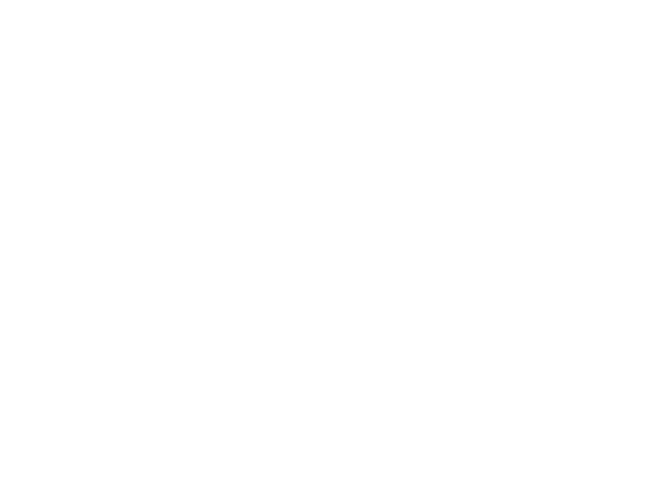

In [5]:
pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge

In [6]:
path_data = "/mnt/data/alzaig/AudioMNIST/data"
print(os.listdir(path_data)[:5])
print(os.listdir(path_data + "/57")[:5])

['57', '35', '22', '37', '12']
['3_57_27.wav', '2_57_4.wav', '0_57_1.wav', '7_57_10.wav', '1_57_48.wav']


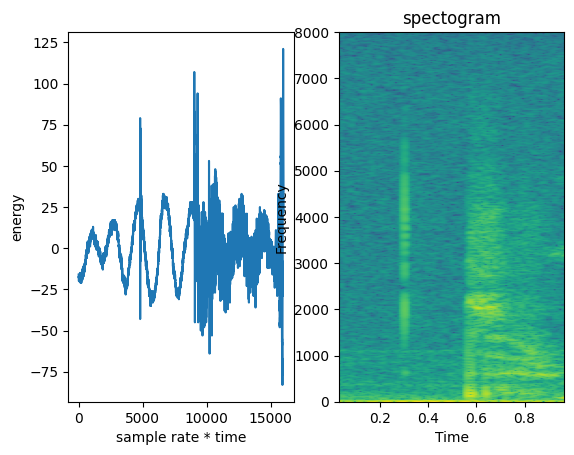

In [7]:
signal_wave = wave.open((path_data + "/57/3_57_27.wav"), 'r')
sample_rate = 16000
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

plot_a = plt.subplot(121)
plot_a.plot(sig)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(122)
plot_b.set_title("spectogram")
plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()

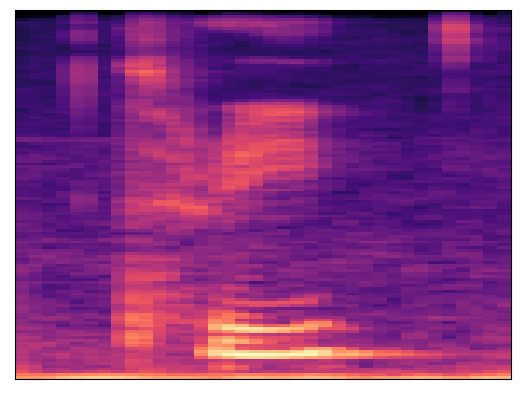

In [8]:
sig, fs = librosa.load(path_data + "/57/3_57_27.wav")
S = librosa.feature.melspectrogram(y=sig, sr=fs)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

In [12]:
# Utility function to get sound and frame rate info
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r') # open the file,retrieve the metadata and the sound data from the file
    frames = wav.readframes(-1) # read all frames from the file ,frames is a string of bytes
    sound_info = pylab.frombuffer(frames, 'int16') # convert the string of bytes to a numpy array
    frame_rate = wav.getframerate() # get the frame rate ,frame_rate is an integer and is the number of frames per second
    wav.close() # close the file
    return sound_info, frame_rate

def get_wav(wav_file):
    sig, fs = librosa.load(wav_file)
    S = librosa.feature.melspectrogram(y=sig, sr=fs)
    return S

# For every recording, make a spectogram and save it as label_speaker_no.png
OUTPUT_DIR = "/mnt/data/alzaig/AudioMNIST"
#os.mkdir(os.path.join(OUTPUT_DIR, 'train'))
#os.mkdir(os.path.join(OUTPUT_DIR, 'test'))

In [13]:
matplotlib.use('Agg')
id = 0
train = 0.8
for file_dir in os.listdir(path_data):
    pathi_dir = os.path.join(path_data, file_dir)
    size = len(os.listdir(pathi_dir))
    train_size = int(size*train)
    for i, filename in enumerate(os.listdir(pathi_dir)):
        if "wav" in filename: # check whether the file is in .wav format
            file_path = os.path.join(pathi_dir, filename) # generate the full path to the file
            if i > train_size:
                file_dist_path = os.path.join(OUTPUT_DIR, f'test/{id}.png')
            else:
                file_dist_path = os.path.join(OUTPUT_DIR, f'train/{id}.png')
            
            if not os.path.exists(file_dist_path):
                sound = get_wav(file_path)
                librosa.display.specshow(librosa.power_to_db(S, ref=np.max))   
                #sound_info, frame_rate = get_wav_info(file_path) # get sound and frame rate info
                #pylab.specgram(sound_info, Fs=frame_rate) # make a spectogram and save it as label_speaker_no.png (e.g. 0_jackson_0.png)
                pylab.savefig(file_dist_path, bbox_inches=None, pad_inches=0) # save the spectogram to the folder with the label as the name
                pylab.close() # close the file
            id += 1
    print(id)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000


In [17]:
!ls /mnt/data/alzaig/AudioMNIST/train | wc -c
!ls /mnt/data/alzaig/AudioMNIST/test | wc -c

231668
57222


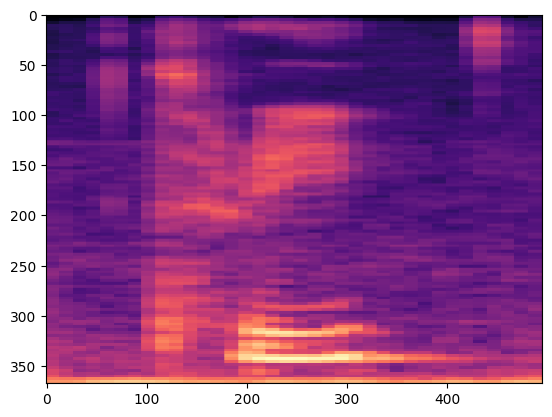

In [103]:
img = cv2.imread('/mnt/data/alzaig/AudioMNIST/train/0.png')
img = img[59:427,81:576]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [27]:
imgs = []
for img_pat in os.listdir("/mnt/data/alzaig/AudioMNIST/train"):
    img = cv2.imread("/mnt/data/alzaig/AudioMNIST/train/" + img_pat)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img[59:427,81:576]
    imgs.append(img.astype(np.float32))
imgs = np.array(imgs)

In [28]:
imgs /= 255.0
imgs.max(), imgs.min()

(0.99607843, 0.0)

In [29]:
np.mean(imgs, axis=(0,1,2)), np.std(imgs, axis=(0,1,2))

(array([0.00382799, 0.00382799, 0.00382799], dtype=float32),
 array([0.06187078, 0.06187078, 0.05896849], dtype=float32))

In [30]:
imgs.shape

(24060, 368, 495, 3)

In [13]:
path_data = "/mnt/data/alzaig/AID"
folders = os.listdir(path_data)
os.makedirs(os.path.join(path_data, "train"))
os.makedirs(os.path.join(path_data, "test"))

In [15]:
folders

['DenseResidential',
 'Farmland',
 'Industrial',
 'Port',
 'Playground',
 'Beach',
 'Commercial',
 'School',
 'River',
 'Airport',
 'Pond',
 'BaseballField',
 'Center',
 'Desert',
 'Parking',
 'StorageTanks',
 'BareLand',
 'SparseResidential',
 'Meadow',
 'Church',
 'Mountain',
 'Resort',
 'MediumResidential',
 'Stadium',
 'Park',
 'Viaduct',
 'Square',
 'Bridge',
 'RailwayStation',
 'Forest']

In [16]:
id = 0
train = 0.8
for file_dir in folders:
    pathi_dir = os.path.join(path_data, file_dir)
    size = len(os.listdir(pathi_dir))
    train_size = int(size*train)
    for i, filename in enumerate(os.listdir(pathi_dir)):
        source_file = os.path.join(pathi_dir, filename)
        if i > train_size:
            file_dist_path = os.path.join(path_data, f'test/{id}.png')
        else:
            file_dist_path = os.path.join(path_data, f'train/{id}.png')
            
        if not os.path.exists(file_dist_path):
            os.rename(source_file, file_dist_path)
        id += 1
    print(id)

410
780
1170
1550
1920
2320
2670
2970
3380
3740
4160
4380
4640
4940
5330
5690
6000
6300
6580
6820
7160
7450
7740
8030
8380
8800
9130
9490
9750
10000
